<a href="https://colab.research.google.com/github/aplneto/IF998/blob/main/03_-_Markov_Decision_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processos finitos de decisão de Markov

_[Capítulo 3](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)_

![image.png]

* No tempo $t \in \mathcal{N}$
  * O estado $S_t \in \mathcal{S}$: resepresentação do ambiente
  * Ação $\mathcal{A}(S_t)$: ação escolhida
  * Recompensa $R_{t+1}\in \mathcal{R}$: recompensa instantânea
  * Novo estado $S_{t+1}$


[image.png]: 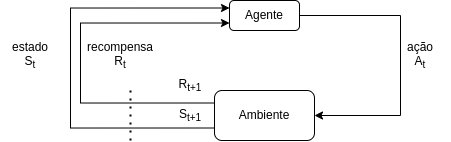

## MDP Finito:

![mdp.png](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Markov_Decision_Process.svg/400px-Markov_Decision_Process.svg.png)

* $\mathcal{S}$, $\mathcal{A}$ e $\mathcal{R}$ são conjuntos finitos.
* Dada uma trajetória: $S_0, A_0, R_1, A_1, R_2, A_2, R_3,...$
* A dinâmica da MDP é dada pela distribuição:

\begin{equation}
p(s\prime,r|s,a)\doteq Pr\{S_t=s\prime,R_t=r|S_{t-1}=s,A_{t-1}=a\}
\end{equation}

In [ ]:
import numpy

# Probabilidades de triplas (Estado, Ação, Novo Estado)
estado_acao = numpy.zeros((3, 2, 3))

# Probabilidade de, no estado 0, ao escolher a ação 0, permanecer no estado 0
estado_acao[0][0][0] = 0.5

# Probabilidade de, no estado zero, ao escolher a ação 0, ir para o estado 1
estado_acao[0][0][1] = 0

# Probabilidade de, no estado zero, ao escolher a ação 0, ir para o estado 2
estado_acao[0][0][2] = 0.5

estado_acao[0][1] = [0, 0, 1]
estado_acao[1][0] = [0.7, 0.1, 0.2]
estado_acao[1][1] = [0, 0.95, 0.05]
estado_acao[2][0] = [0.4, 0, 0.6]
estado_acao[2][1] = [0.3, 0.3, 0.4]

# Recompensas das ações transições
recompensas = numpy.zeros((3, 2, 3))

# recompensas possíveis ao escolher a ação 0 no estado 1
recompensas[1][0] = [5, 0, 0]
# recompensas possíveis ao escolher a ação 1 no estado 2
recompensas[2][1] = [-1, 0, 0]

### Interface Agente-Ambiente

* Probabilidade de transição de estados:

  $
  p(s\prime|s,a)\doteq Pr\{S_t=s\prime|S_{t-1}=s,A_{t-1}=a\}=\sum_{r\in R}p(s\prime,r|s,a)
  $

* Recompensa esperada para um par estado-ação:

  $
  r(s,a)\doteq\mathbb{E}[R_t|S_{t-1}=s,A_{t-1}=a]=\sum_{r\in \mathcal{R}}r\sum_{s\prime\in\mathcal{S}}p(s\prime,r|s,a)
  $

* Recompensa esperada para uma tripla estado-ação-estado

  $
  r(s,a,s\prime)\doteq\mathbb{E}[R_tZS_{t-1}=s,A_{t-1}=a,S_t=s\prime]=\sum_{r\in\mathcal{R}}r\frac{p(s\prime,r|s,a)}{p(s\prime|s,a)}
  $

## Objetivos e Recompensa

* Recompensa:
  * Forma de comunicação com o agente
  * Indica se ele está indo pelo caminho certo ou errado
* Objetivo:
  * Maior expectativa de valor acumulado do sinal de recompensa

## Retornos e Episódios

* Retorno acumulado para tarefas episódicas:
  * com time step final T: $G_t\doteq R_{t+1}+R_{t+2}+R_{t+3}+...+R_T$
  \begin{equation}
  G_t=\sum_{t\prime=t+1}^T R_{t\prime}
  \end{equation}
* Retorno para tarefas contínuas:
  * Recompenas sem descontos
  \begin{equation}
  G_t=\sum^{+\infty}_{t\prime=t+1}R_{t\prime}\text{ (chamado de "retorno em t")}
  \end{equation}

* Para tarefas contínuas:
  * Recompensas com descontos com<br>
  $
  G_t\doteq R_{t=1}+\gamma R_{t+2}+\gamma^2R_{t+3}+\gamma^3R_{t+4}+...
  $<br>
  $
  G_t=\sum^{+\infty}_{k=0}\gamma^kR_{t+1+k}
  $<br>
  e $0 \le\gamma\le 1$. Tipicamente [0.9, 0.99]
* $\gamma$ é chamado de _discount factor_ e valores maiores dão mais valor a recompensas em futuro próximo em determinto da recompensa total acumulada. Compensa a incerteza sobre os estados futuros.

* Propriedade recursiva

\begin{aligned}
G_t\doteq R_{t=1}+\gamma R_{t+2}+\gamma^2R_{t+3}+\gamma^3R_{t+4}+...\\
= R_{t+1} + \gamma(R_{t+2}+\gamma R_{t+3} + \gamma^2R_{t+4} + ...\\
= R_{t+1}+\gamma G_{t+1}\\
\end{aligned}

* Finitude se |R| ≤ M
\begin{equation}
|G_t| \le
\begin{cases}
(T - t -1)M\text{ if }T<\infty
\\\\
M\frac{1}{1-\gamma}\text{ otherwise}
\end{cases}
\sum_{k=0}^{\infty}\gamma^k=\frac{1}{1-\gamma}
\end{equation}

* Notação unificada para tarefas episódicas e contínuas:

![unified-notation.png]

* Formas:
  * Episódica: $G_t=\sum^{T}_{t\prime=t+1}R_{t\prime}$
  * Contínua: $G_t = \sum_0^{+\infty}\gamma^kR_{t+1+k}$
  * Unificada: $G_t=\sum^T_{k=t+1}\gamma^{k-t-1}R_k$

* Com $T=\infty$ ou $\gamma<1$, mas não ambos.
[unified-notation.png]: 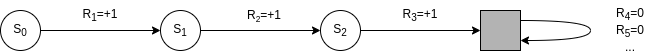

## Políticas e Valores

* Assumindo um agente seguindo uma política $\pi(a|s)$
* Função Valor de estado:
\begin{equation}
v_\pi(s)=\mathbb{E}_\pi[G_t|S_t=s]=\mathbb{E}_\pi\left[\sum^\infty_{k=0}\gamma^kR_{t+k+1}\middle|S_t=s\right]
\end{equation}
* Função Valor da Ação (qualidade da ação):
\begin{equation}
q_\pi(s,a)=\mathbb{E}_\pi[G_t|S_t=s, A_t=a]=\mathbb{E}_\pi\left[\sum^\infty_{k=0}\gamma^kR_{t+k+1}\middle|S_t=s, A_t=a\right]
\end{equation}
* Assumindo que $\pi(a|s)$ seja estacionária

### [Gridworld][fonte]

![gridworld.png](https://miro.medium.com/max/507/1*iX-Fu5YzUZ8CNEZ86BvfKA.png)

**Exemplo 3.5: Gridworld** A figura 3.2 (acima) mostra um ambiente gridworld retangular de uma MDP finita simples. As células do grid representam os possíveis estados do ambiente. Em cada célula, quatro ações são possíveis: *norte*, *sul*, *leste* e *oeste*, que fazem o agente se mover na direção respectiva no grid. Ações que fariam o agente sair do grid não mudam a sua posição e resultam numa recompensa de $-1$. Outras ações resultam numa recompensa de $0$, exceto ações tomadas a partir dos estados especiais $A$ e $B$. Ações tomadas a partir do estado $A$ resultam numa recompensa de $+10$ e levam o agente para a posição $A^\prime$. Ações tomadas do estado $B$ resultam numa recompensa de +5 e levam o agentepara o estado $B^\prime$.

[fonte]: https://realdiganta.medium.com/coding-the-gridworld-example-from-deepminds-reinforcement-learning-course-in-python-17d74335fcbc

In [ ]:
# 5 x 5 possíveis estados, 4 ações possíveis [N, S, L, O]
rewards = numpy.zeros((5, 5, 4))

for n in range(0, 5):
  rewards[0][n] = [-1, 0, 0, 0] # Linha superior
  rewards[n][0] = [0, 0, 0, -1] # Coluna esquerda
  rewards[4][n] = [0, -1, 0, 0] # Linha inferior
  rewards[n][4] = [0, 0, -1, 0] # Coluna direita

rewards[0][0] = [-1, 0, 0, -1] # Canto superior esquerdo
rewards[4][0] = [0, -1, 0, -1] # Canto inferior esquerdo
rewards[4][4] = [0, -1, -1, 0] # Canto inferior direito
rewards[0][4] = [-1, 0, -1, 0] # Canto superior direito

rewards[0][1] = [10] * 4 # Estado A
rewards[0][3] = [5] * 4 # Estado B

print(rewards)

[[[-1.  0.  0. -1.]
  [10. 10. 10. 10.]
  [-1.  0.  0.  0.]
  [ 5.  5.  5.  5.]
  [-1.  0. -1.  0.]]

 [[ 0.  0.  0. -1.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0. -1.  0.]]

 [[ 0.  0.  0. -1.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0. -1.  0.]]

 [[ 0.  0.  0. -1.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0. -1.  0.]]

 [[ 0. -1.  0. -1.]
  [ 0. -1.  0.  0.]
  [ 0. -1.  0.  0.]
  [ 0. -1.  0.  0.]
  [ 0. -1. -1.  0.]]]


In [ ]:
def mover(dir, pos):
  '''
  Retorna a recompensa recebida e a nova posição do agente no grid

    Parâmetros:
        dir (str): Caractere ou numero inteiro que indica a direção
          * 0 ou N -> Norte
          * 1 ou S -> Sul
          * 2 ou L -> Leste
          * 3 ou O -> Oeste
        pos (int, int): Tupla de dois inteiros que indica a posição no
        grid.
    
    Returns:
      (int, int): nova posição
  '''
  global rewards
  if isinstance(dir, str):
    dir = 'nslo'.index(dir.lower())
  r = rewards[pos][dir]
  if r == 10: # Isso significa que estávamos em A
    nova_posicao = (4, 1)
  elif r == 5: # Isso significa que estávamos em B
    nova_posicao = (2, 3)
  elif r == -1:
    nova_posicao = pos
  else:
    funcao_movimento = (
        lambda row, column: (row-1, column), # Norte
        lambda row, column: (row+1, column), # Sul
        lambda row, column: (row, column+1), # Leste
        lambda row, column: (row, column-1) # Oeste
    )[dir]
    nova_posicao = funcao_movimento(*pos)
  return nova_posicao

* Lembrando que:
[$\mathbb{E}[X]=\sum^{\infty}_{i=1}x_ip(x_i)$](https://pt.wikipedia.org/wiki/Valor_esperado) 

In [ ]:
gamma = 0.9

pi = numpy.asarray([0.25] * 4) # Política aleatória

v = numpy.zeros((5, 5)) # Valor da política aleatória
vo = numpy.zeros((5, 5)) # Valor da política ótima (Equação de Bellman)
po = numpy.zeros((5, 5)) # Política ótima

for t in range(20):
  for row in range(5):
    for column in range(5):
      # Estados imediatamente próximos
      directions = [mover(d, (row, column)) for d in 'nslo']
      # Valores atuais dos estados imediatamente próximos
      values = v[tuple(zip(*directions))]
      optimal_values = vo[tuple(zip(*directions))]
      # Valor da política aleatória
      v[row][column] = numpy.sum(pi * (rewards[row][column] + (gamma * values)))
      # Valor da política ótima
      vo[row][column] = numpy.max(
          (1 * (rewards[row][column] + (gamma * optimal_values)))
      )
      po[row][column] = numpy.argmax(
          (1 * (rewards[row][column] + (gamma * optimal_values)))
      )
print("Valor dos estados na política aleatória")
print(numpy.round(v, 1))
print("Valor dos estados na política ótima")
print(numpy.round(vo, 1))
print("Política ótima")
print(numpy.vectorize('\u2191\u2193\u2192\u2190'.__getitem__)(po.astype(int)))

Valor dos estados na política aleatória
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.6]
 [ 0.1  0.8  0.7  0.4 -0.4]
 [-0.9 -0.4 -0.3 -0.6 -1.2]
 [-1.8 -1.3 -1.2 -1.4 -2. ]]
Valor dos estados na política ótima
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
Política ótima
[['→' '↑' '←' '↑' '←']
 ['↑' '↑' '↑' '←' '←']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑']
 ['↑' '↑' '↑' '↑' '↑']]


## Políticas e valores

* Comparando políticas:<br>
$
v_\pi(s)\ge v_{\pi\prime}(s)\to\pi\ge\pi\prime
$
* Função estado-valor ótima:<br>
$
v_*(s)\doteq\max_\pi v_\pi(s)\space s\in S
$
* Função estado-ação-valor ótima:<br>
$
q_*(s,a)\doteq\max_\pi q_\pi(s,a)\space s\in S\space e\space a \in A(s)
$
* Reescrevendo em função das equações acima:<br>
$
q_*(s,a)=\mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s, A_t=a]
$
* Equação de Bellman otimizada:<br>
$
v_*(s) = \max_aq_*(s,a)\\
= \max_a\mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s,A_t=a]\\
= \max_a\sum_{s\prime,r}p(s\prime,r|s,a)(r+\gamma v_*(s\prime))
$
* Equação de Bellman otimizada para $q$:<br>
$
q_*(s,a)=\mathbb{E}\left[R_{t+1}+\gamma\max_{a\prime}q_*(S_{t+1},a\prime)\middle|S_t=s,A_t=a\right]\\
= \sum_{s\prime,r}p(s\prime,r|s,a)\left(r+\max_{a\prime}\gamma q_*(s\prime,a\prime)\right)
$

## Otimização e Aproximação

* Política ótima muito difícil de se aprender em ambientes mais complexos
* Entender o ambiente é importante e ajuda bastante, porém não é suficiente
* Computacionalmente custoso mesmo em casos finitos
* Precisa-se recorrer à aproximações para convergir modelos